In [3]:
import six
#https://stackoverflow.com/questions/61867945/python-import-error-cannot-import-name-six-from-sklearn-externals
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import numpy as np
import time
import matplotlib.pyplot as plt
import random

In [234]:
def plot_score_speed_iters(storage, title):
    fig, axes = plt.subplots(figsize=(18, 4), ncols=3)
    for algo in algos:
        axes[0].plot(list(range(10, 100, 20)), storage[algo]["times"], label=algo, marker=".")
        axes[1].plot(list(range(10, 100, 20)), storage[algo]["scores"], marker=".")
        axes[2].plot(list(range(10, 100, 20)), storage[algo]["curves"], marker=".")
    fig.legend()
    axes[0].set_title("Run Time For All Algorithms by Array Length")
    axes[0].set_xlabel("Length of Array")
    axes[0].set_ylabel("Process Run Time")
    
    axes[1].set_title("Fitness Scores For All Algorithms by Array Length")
    axes[1].set_xlabel("Length of Array")
    axes[1].set_ylabel("Fitness Score")
    
    axes[2].set_title("Number of Iterations For All Algorithms by Array Length")
    axes[2].set_xlabel("Length of Array")
    axes[2].set_ylabel("Iterations")
    fig.suptitle(title)

In [12]:
def timeit(routine, times, fitnesses, curves):
    start = time.process_time()
    state, fitness, curve = routine()
    stop = time.process_time()
    run_time = stop - start
    times.append(run_time)
    fitnesses.append(fitness)
    curves.append(len(curve))

In [23]:
def plot_xval_results(xaxis, scores, times, title, parameter):
    fig, axes = plt.subplots(figsize=(12, 4), ncols=2)
    for algo in algos:
        axes[0].plot(xaxis, times, label=algo, marker=".")
        axes[1].plot(xaxis, scores, marker=".")
    axes[0].set_title("Run Time For All Algorithms by {0}".format(parameter))
    axes[0].set_xlabel("{0}".format(parameter))
    axes[0].set_ylabel("Process Run Time")
    
    axes[1].set_title("Fitness Scores For All Algorithms by {0}".format(parameter))
    axes[1].set_xlabel("{0}".format(parameter))
    axes[1].set_ylabel("Fitness Score")
    fig.suptitle(title)   

In [7]:
def rhc_xval(problem):
    times, scores = [], []
    axis = range(0, 1000, 50)
    for rr in axis:
        timeit(lambda: mlrose.random_hill_climb(problem=problem, restarts=rr, curve=True), times, scores, [])
    return axis, times, scores

In [181]:
length = 50
problem = mlrose.DiscreteOpt(length=length, fitness_fn=mlrose.FlipFlop())
rhc_axis, fp_rhc_time, fp_rhc_scores = rhc_xval(problem)

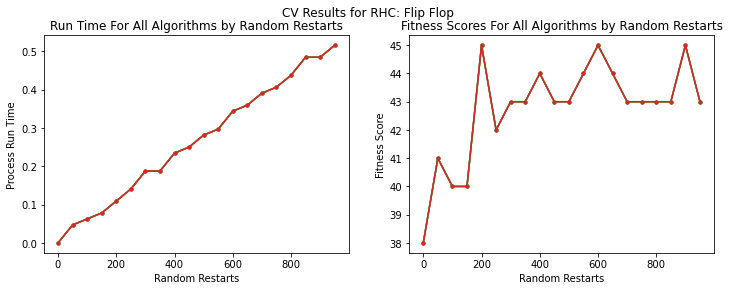

In [182]:
plot_xval_results(xaxis=rhc_axis, times=fp_rhc_time, scores=fp_rhc_scores,
                  title="CV Results for RHC: Flip Flop", parameter="Random Restarts")

In [8]:
def sa_xval(problem):
    times, scores = [], []
    axis = np.linspace(.1, .99, 10)
    for decay in axis:
        schedule = mlrose.GeomDecay(init_temp=10, decay=decay, min_temp=1)
        timeit(lambda: mlrose.simulated_annealing(problem=problem, schedule=schedule, curve=True), times, scores, [])
    return axis, times, scores

In [184]:
length = 50
problem = mlrose.DiscreteOpt(length=length, fitness_fn=mlrose.FlipFlop())
sa_axis, fp_sa_time, rp_sa_scores = sa_xval(problem)

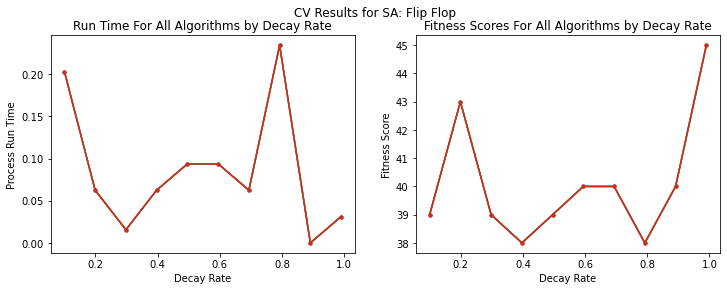

In [186]:
plot_xval_results(xaxis=sa_axis, times=fp_sa_time, scores=rp_sa_scores,
                  title="CV Results for SA: Flip Flop", parameter="Decay Rate")

In [9]:
def ga_xval(problem):
    times, scores = [], []
    axis = np.linspace(.1, .99, 10)
    for mr in axis:
        timeit(lambda: mlrose.genetic_alg(problem=problem, mutation_prob=mr, curve=True), times, scores, [])
    return axis, times, scores

In [189]:
length = 50
problem = mlrose.DiscreteOpt(length=length, fitness_fn=mlrose.FlipFlop())
ga_axis, fp_ga_time, rp_ga_scores = ga_xval(problem)

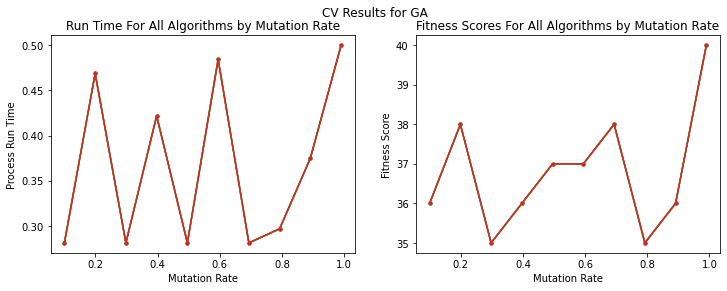

In [190]:
plot_xval_results(xaxis=ga_axis, times=fp_ga_time, scores=rp_ga_scores,
                  title="CV Results for GA", parameter="Mutation Rate")

In [10]:
def mimic_xval(problem):
    times, scores = [], []
    axis = np.linspace(.1, .99, 10)
    for kp in axis:
        timeit(lambda: mlrose.mimic(problem=problem, keep_pct=kp, curve=True), times, scores, [])
    return axis, times, scores

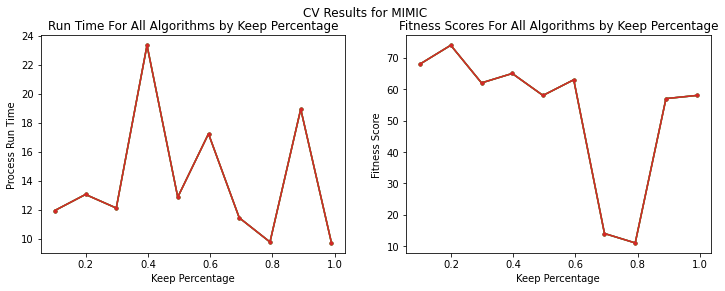

In [192]:
plot_xval_results(xaxis=mimic_axis, times=fp_mimic_time, scores=rp_mimic_scores,
                  title="CV Results for MIMIC", parameter="Keep Percentage")

In [228]:
def flip_flop(num_bits, storage):
    ff = mlrose.DiscreteOpt(length=num_bits, fitness_fn=mlrose.FlipFlop())
    timeit(lambda: mlrose.random_hill_climb(problem=ff, restarts=200, curve=True),
                   storage["rhc"]["times"], storage["rhc"]["scores"], storage["rhc"]["curves"])
    timeit(lambda: mlrose.simulated_annealing(problem=ff, curve=True, schedule=mlrose.GeomDecay(init_temp=10, decay=.99, min_temp=1)),
                   storage["sa"]["times"], storage["sa"]["scores"], storage["sa"]["curves"])
    timeit(lambda: mlrose.genetic_alg(problem=ff, mutation_prob=.99, curve=True),
                   storage["ga"]["times"], storage["ga"]["scores"], storage["ga"]["curves"])
    timeit(lambda: mlrose.mimic(problem=ff, keep_pct=.2, curve=True),
                   storage["mimic"]["times"], storage["mimic"]["scores"], storage["mimic"]["curves"])

In [229]:
ff_storage = {}
algos = ["rhc", "sa", "ga", "mimic"]
for algo in algos:
    ff_storage[algo] = {}
    ff_storage[algo]["times"], ff_storage[algo]["scores"], ff_storage[algo]["curves"] = [], [], []
for bits in bits_range:
    flip_flop(bits, ff_storage)

In [236]:
ff_storage

{'rhc': {'times': [0.046875, 0.0625, 0.125, 0.171875, 0.203125],
  'scores': [9.0, 26.0, 44.0, 57.0, 72.0],
  'curves': [3030, 4376, 5197, 5888, 6127]},
 'sa': {'times': [0.0, 0.03125, 0.046875, 0.125, 0.140625],
  'scores': [9.0, 24.0, 40.0, 51.0, 71.0],
  'curves': [342, 1580, 1776, 3058, 3254]},
 'ga': {'times': [0.15625, 0.359375, 0.703125, 0.59375, 0.46875],
  'scores': [9.0, 26.0, 39.0, 53.0, 63.0],
  'curves': [11, 18, 27, 18, 12]},
 'mimic': {'times': [0.328125, 3.9375, 14.015625, 28.234375, 73.6875],
  'scores': [9.0, 28.0, 43.0, 62.0, 80.0],
  'curves': [11, 15, 19, 20, 31]}}

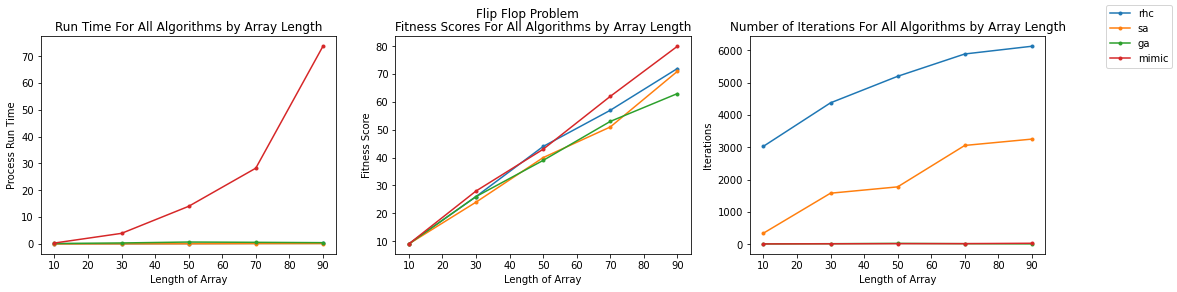

In [235]:
plot_score_speed_iters(ff_storage, title="Flip Flop Problem")

In [198]:
length = 50
problem = mlrose.DiscreteOpt(length=length, fitness_fn=mlrose.ContinuousPeaks())
rhc_axis, cp_rhc_time, cp_rhc_scores = rhc_xval(problem)

length = 50
problem = mlrose.DiscreteOpt(length=length, fitness_fn=mlrose.ContinuousPeaks())
mimic_axis, cp_mimic_time, cp_mimic_scores = mimic_xval(problem)

problem = mlrose.DiscreteOpt(length=length, fitness_fn=mlrose.ContinuousPeaks())
ga_axis, cp_ga_time, cp_ga_scores = ga_xval(problem)

length = 50
problem = mlrose.DiscreteOpt(length=length, fitness_fn=mlrose.ContinuousPeaks())
sa_axis, cp_sa_time, cp_sa_scores = sa_xval(problem)

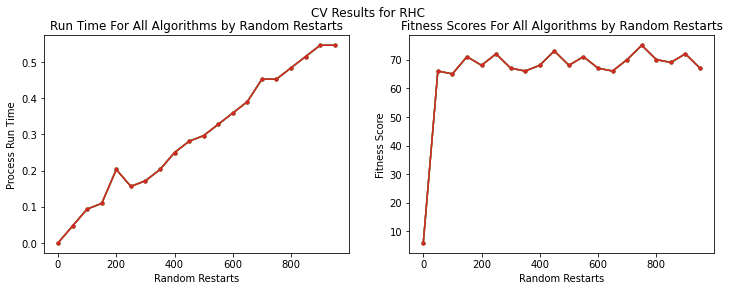

In [199]:
plot_xval_results(xaxis=rhc_axis, times=cp_rhc_time, scores=cp_rhc_scores,
                  title="CV Results for RHC", parameter="Random Restarts")

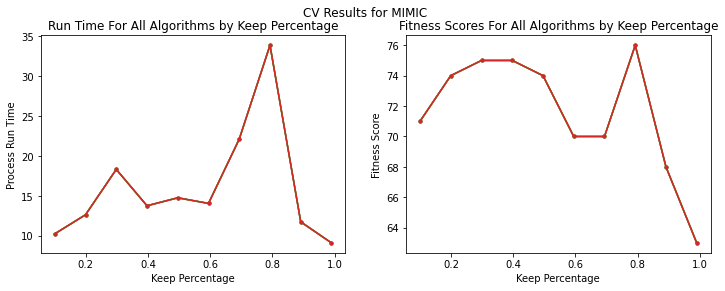

In [204]:
plot_xval_results(xaxis=mimic_axis, times=cp_mimic_time, scores=cp_mimic_scores,
                  title="CV Results for MIMIC", parameter="Keep Percentage")

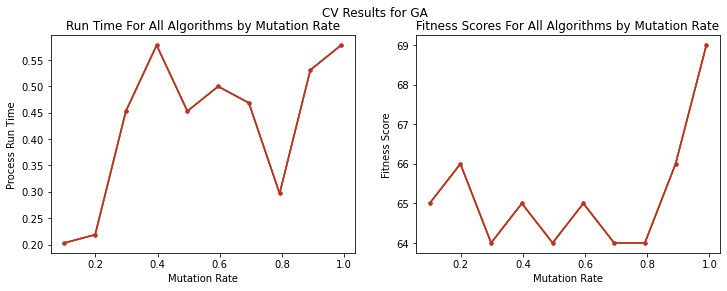

In [201]:
plot_xval_results(xaxis=ga_axis, times=cp_ga_time, scores=cp_ga_scores,
                  title="CV Results for GA", parameter="Mutation Rate")

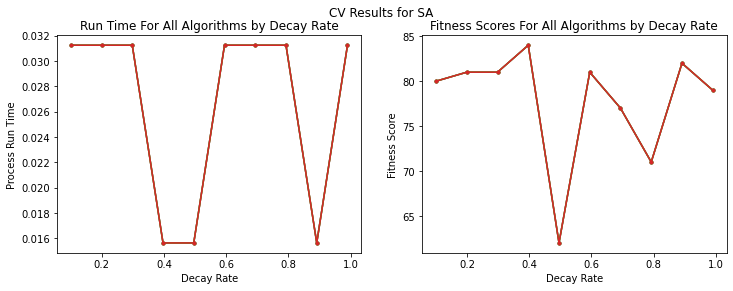

In [205]:
plot_xval_results(xaxis=sa_axis, times=cp_sa_time, scores=cp_sa_scores,
                  title="CV Results for SA", parameter="Decay Rate")

In [237]:
def continous_peaks(num_bits, storage):
    problem = mlrose.DiscreteOpt(length=num_bits, fitness_fn=mlrose.ContinuousPeaks())
    timeit(lambda: mlrose.random_hill_climb(problem=problem, curve=True, restarts=700),
                   storage["rhc"]["times"], storage["rhc"]["scores"], storage["rhc"]["curves"])
    timeit(lambda: mlrose.simulated_annealing(problem=problem, curve=True,
                                             schedule=mlrose.GeomDecay(init_temp=10, decay=.4, min_temp=1)),
                   storage["sa"]["times"], storage["sa"]["scores"], storage["sa"]["curves"])
    timeit(lambda: mlrose.genetic_alg(problem=problem, curve=True, mutation_prob=.99),
                   storage["ga"]["times"], storage["ga"]["scores"], storage["ga"]["curves"])
    timeit(lambda: mlrose.mimic(problem=problem, curve=True, keep_pct=.8),
                   storage["mimic"]["times"], storage["mimic"]["scores"], storage["mimic"]["curves"])

In [232]:
cp_storage = {}
algos = ["rhc", "sa", "ga", "mimic"]
for algo in algos:
    cp_storage[algo] = {}
    cp_storage[algo]["times"], cp_storage[algo]["scores"], cp_storage[algo]["curves"] = [], [], []
for bits in bits_range:
    continous_peaks(bits, cp_storage)

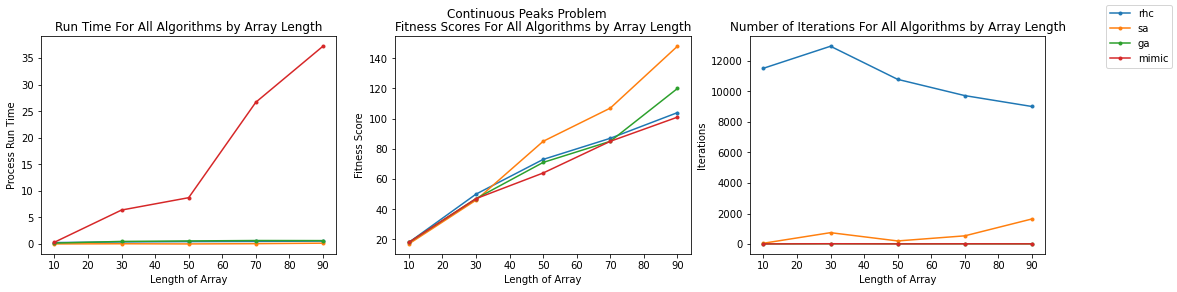

In [239]:
plot_score_speed_iters(cp_storage, title="Continuous Peaks Problem")

In [ ]:
length = 50
problem = mlrose.DiscreteOpt(length=length, fitness_fn=mlrose.ContinuousPeaks())
rhc_axis, cp_rhc_time, cp_rhc_scores = rhc_xval(problem)

length = 50
problem = mlrose.DiscreteOpt(length=length, fitness_fn=mlrose.ContinuousPeaks())
mimic_axis, cp_mimic_time, cp_mimic_scores = mimic_xval(problem)

problem = mlrose.DiscreteOpt(length=length, fitness_fn=mlrose.ContinuousPeaks())
ga_axis, cp_ga_time, cp_ga_scores = ga_xval(problem)

length = 50
problem = mlrose.DiscreteOpt(length=length, fitness_fn=mlrose.ContinuousPeaks())
sa_axis, cp_sa_time, cp_sa_scores = sa_xval(problem)

In [246]:
np.random.randint(10, 1000, 10)

array([461, 739, 565, 105, 851,  65, 394, 113,  48, 985])

In [253]:
import random

In [271]:
cp_sa_time

[0.03125,
 0.03125,
 0.03125,
 0.015625,
 0.015625,
 0.03125,
 0.03125,
 0.03125,
 0.015625,
 0.03125]

In [19]:
length = 10
points = []
for x in range(length):
    for y in range(length):
        random.seed(x+y)
        points.append((x, y, round(random.uniform(0.0, 1.0), 2)))

In [21]:
fitness_dists = mlrose.TravellingSales(distances=points)
problem = mlrose.TSPOpt(length=length, fitness_fn=fitness_dists, maximize=True)
print("rhc")
rhc_axis, tsp_rhc_time, tsp_rhc_scores = rhc_xval(problem)
print("mimic")
mimic_axis, tsp_mimic_time, tsp_mimic_scores = mimic_xval(problem)
print("ga")
ga_axis, tsp_ga_time, tsp_ga_scores = ga_xval(problem)
print('sa')
sa_axis, tsp_sa_time, tsp_sa_scores = sa_xval(problem)

rhc
mimic
ga
sa


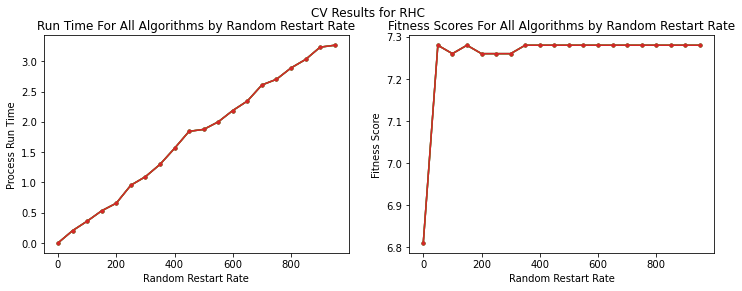

In [29]:
plot_xval_results(xaxis=rhc_axis, times=tsp_rhc_time, scores=tsp_rhc_scores,
                  title="CV Results for RHC", parameter="Random Restart Rate")

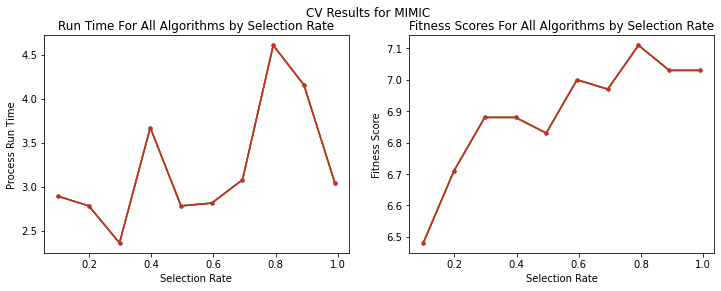

In [28]:
plot_xval_results(xaxis=mimic_axis, times=tsp_mimic_time, scores=tsp_mimic_scores,
                  title="CV Results for MIMIC", parameter="Selection Rate")

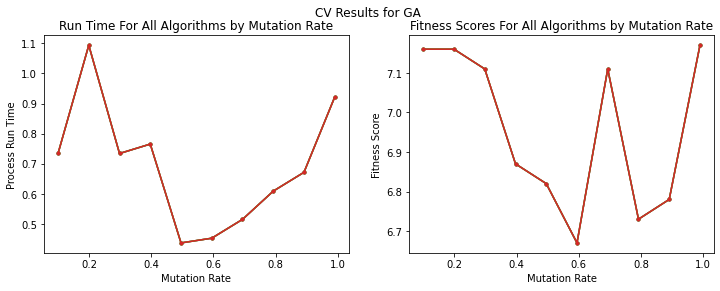

In [33]:
plot_xval_results(xaxis=ga_axis, times=tsp_ga_time, scores=tsp_ga_scores,
                  title="CV Results for GA", parameter="Mutation Rate")

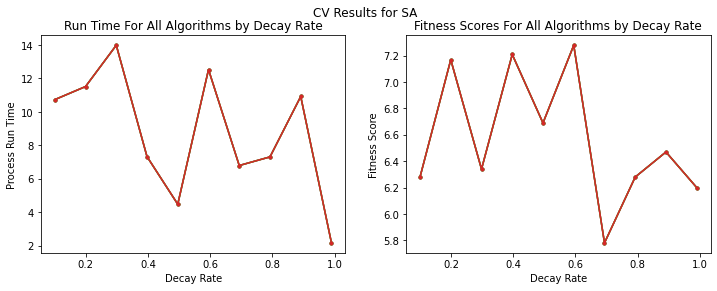

In [34]:
plot_xval_results(xaxis=sa_axis, times=tsp_sa_time, scores=tsp_sa_scores,
                  title="CV Results for SA", parameter="Decay Rate")

In [35]:
bits_range = list(range(10, 100, 20))

In [36]:
def run_tsp(num_points, storage):
    points = []
    for x in range(num_points):
        for y in range(num_points):
            random.seed(x+y)
            points.append((x, y, random.uniform(0.0, 1.0)))
    fitness_dists = mlrose.TravellingSales(distances=points)
    problem = mlrose.TSPOpt(length=num_points, fitness_fn=fitness_dists, maximize=True)
    timeit(lambda: mlrose.random_hill_climb(problem=problem, curve=True, restarts=20),
                   storage["rhc"]["times"], storage["rhc"]["scores"], storage["rhc"]["curves"])
    timeit(lambda: mlrose.simulated_annealing(problem=problem, curve=True,
                                             schedule=mlrose.GeomDecay(init_temp=10, decay=.95, min_temp=1)),
                   storage["sa"]["times"], storage["sa"]["scores"], storage["sa"]["curves"])
    timeit(lambda: mlrose.genetic_alg(problem=problem, curve=True, mutation_prob=.1),
                   storage["ga"]["times"], storage["ga"]["scores"], storage["ga"]["curves"])
    timeit(lambda: mlrose.mimic(problem=problem, curve=True, keep_pct=.2),
                   storage["mimic"]["times"], storage["mimic"]["scores"], storage["mimic"]["curves"])

In [38]:
tsp_storage = {}
algos = ["rhc", "sa", "ga", "mimic"]
for algo in algos:
    tsp_storage[algo] = {}
    tsp_storage[algo]["times"], tsp_storage[algo]["scores"], tsp_storage[algo]["curves"] = [], [], []
for bits in bits_range:
    print(bits)
    run_tsp(bits, tsp_storage)

10
30
50
70
90


In [49]:
def plot_score_speed_iters(storage, title):
    fig, axes = plt.subplots(figsize=(18, 4), ncols=3)
    for algo in algos:
        axes[0].plot(bits_range, storage[algo]["times"], label=algo, marker=".")
        axes[1].plot(bits_range, storage[algo]["scores"], marker=".")
        axes[2].plot(bits_range, storage[algo]["curves"], marker=".")
    fig.legend()
    axes[0].set_title("Run Time For All Algorithms by Array Length")
    axes[0].set_xlabel("Length of Array")
    axes[0].set_ylabel("Process Run Time")
    
    axes[1].set_title("Fitness Scores For All Algorithms by Array Length")
    axes[1].set_xlabel("Length of Array")
    axes[1].set_ylabel("Fitness Score")
    
    axes[2].set_title("Number of Iterations For All Algorithms by Array Length")
    axes[2].set_xlabel("Length of Array")
    axes[2].set_ylabel("Iterations")
    fig.suptitle(title)

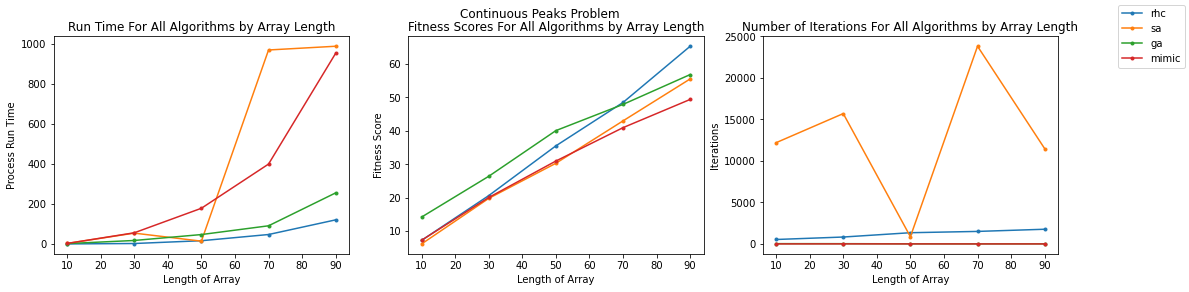

In [50]:
plot_score_speed_iters(tsp_storage, title="Continuous Peaks Problem")